In [130]:
# Importing libraries that I am going to use

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
# Importing the layoffs dataset

df = pd.read_csv(r"C:\Users\Bapela Kanyane\Downloads\layoffs.csv")
df

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
0,Atlassian,Sydney,Other,500.0,0.05,3/6/2023,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,3/6/2023,Post-IPO,United States,525.0
2,Alerzo,Ibadan,Retail,400.0,NaN,3/6/2023,Series B,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,NaN,3/6/2023,Unknown,India,631.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,3/3/2023,Unknown,Brazil,788.0
...,...,...,...,...,...,...,...,...,...
2356,Blackbaud,Charleston,Other,500.0,0.14,NaN,Post-IPO,United States,NaN
2357,Yahoo,SF Bay Area,Consumer,1600.0,0.20,2/9/2023,Acquired,United States,6.0
2358,Hibob,Tel Aviv,HR,70.0,0.30,3/30/2020,Series A,Israel,45.0
2359,Casper,New York City,Retail,NaN,NaN,9/14/2021,Post-IPO,United States,339.0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2361 entries, 0 to 2360
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company                2361 non-null   object 
 1   location               2361 non-null   object 
 2   industry               2357 non-null   object 
 3   total_laid_off         1621 non-null   float64
 4   percentage_laid_off    1576 non-null   float64
 5   date                   2360 non-null   object 
 6   stage                  2355 non-null   object 
 7   country                2361 non-null   object 
 8   funds_raised_millions  2152 non-null   float64
dtypes: float64(3), object(6)
memory usage: 166.1+ KB


In [133]:
# I what to see if there is any duplicated data 

df.duplicated().sum()

5

In [134]:
# Removing the dublicates 

df = df.drop_duplicates()
df

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
0,Atlassian,Sydney,Other,500.0,0.05,3/6/2023,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,3/6/2023,Post-IPO,United States,525.0
2,Alerzo,Ibadan,Retail,400.0,NaN,3/6/2023,Series B,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,NaN,3/6/2023,Unknown,India,631.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,3/3/2023,Unknown,Brazil,788.0
...,...,...,...,...,...,...,...,...,...
2352,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,3/13/2020,Unknown,United States,45.0
2353,Panda Squad,SF Bay Area,Consumer,6.0,0.75,3/13/2020,Seed,United States,1.0
2354,Tamara Mellon,Los Angeles,Retail,20.0,0.40,3/12/2020,Series C,United States,90.0
2355,EasyPost,Salt Lake City,Logistics,75.0,NaN,3/11/2020,Series A,United States,12.0


CHECKING FOR ANY INCONSISTENCIES AND CORRECTING THEM

In [135]:
df.company.unique()

array(['Atlassian', 'SiriusXM', 'Alerzo', ..., 'Panda Squad',
       'Tamara Mellon', 'Blackbaud'], dtype=object)

In [136]:
df.industry.unique()

array(['Other', 'Media', 'Retail', 'Education', 'Real Estate',
       'Transportation', 'Marketing', nan, 'Healthcare', 'Security',
       'Food', 'Fitness', 'Consumer', 'Logistics', 'HR', 'Support',
       'Travel', 'Crypto', 'Finance', 'Data', 'Sales', 'Infrastructure',
       'Hardware', 'Product', 'Construction', 'Legal', 'Energy',
       'Manufacturing', 'Recruiting', 'Aerospace', 'Crypto Currency',
       'Fin-Tech', 'CryptoCurrency'], dtype=object)

In [137]:
df["industry"]=df["industry"].str.replace("Crypto Currency","Crypto")
df["industry"]=df["industry"].str.replace("CryptoCurrency","Crypto")

C:\Users\Bapela Kanyane\AppData\Local\Temp\ipykernel_7644\1669300884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["industry"]=df["industry"].str.replace("Crypto Currency","Crypto")
C:\Users\Bapela Kanyane\AppData\Local\Temp\ipykernel_7644\1669300884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["industry"]=df["industry"].str.replace("CryptoCurrency","Crypto")


In [138]:
df.industry.unique()

array(['Other', 'Media', 'Retail', 'Education', 'Real Estate',
       'Transportation', 'Marketing', nan, 'Healthcare', 'Security',
       'Food', 'Fitness', 'Consumer', 'Logistics', 'HR', 'Support',
       'Travel', 'Crypto', 'Finance', 'Data', 'Sales', 'Infrastructure',
       'Hardware', 'Product', 'Construction', 'Legal', 'Energy',
       'Manufacturing', 'Recruiting', 'Aerospace', 'Fin-Tech'],
      dtype=object)

In [139]:
df.stage.unique()

array(['Post-IPO', 'Series B', 'Unknown', 'Acquired', 'Series F',
       'Series E', 'Series A', 'Subsidiary', 'Series C', 'Series G',
       'Series D', 'Seed', 'Series H', 'Private Equity', 'Series J', nan,
       'Series I'], dtype=object)

In [140]:
df.country.unique()

array(['Australia', 'United States', 'Nigeria', 'India', 'Brazil',
       'United States.', 'France', 'Germany', 'Israel', 'Sweden',
       'United Kingdom', 'Japan', 'South Korea', 'China', 'Italy',
       'Singapore', 'Indonesia', 'Estonia', 'Canada', 'Ireland',
       'Finland', 'Netherlands', 'Spain', 'Portugal', 'Chile', 'Colombia',
       'Argentina', 'Seychelles', 'Austria', 'Mexico', 'Switzerland',
       'Egypt', 'Kenya', 'Luxembourg', 'Greece', 'Poland', 'Norway',
       'Belgium', 'Denmark', 'Hong Kong', 'New Zealand', 'Malaysia',
       'Hungary', 'Vietnam', 'Thailand', 'Lithuania', 'Ghana', 'Senegal',
       'Pakistan', 'United Arab Emirates', 'Peru', 'Bahrain', 'Romania',
       'Turkey', 'Russia', 'Uruguay', 'Bulgaria', 'South Africa',
       'Czech Republic', 'Myanmar'], dtype=object)

In [141]:
df["country"]=df["country"].str.replace("United States.","United States")
df

C:\Users\Bapela Kanyane\AppData\Local\Temp\ipykernel_7644\587770639.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["country"]=df["country"].str.replace("United States.","United States")
C:\Users\Bapela Kanyane\AppData\Local\Temp\ipykernel_7644\587770639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["country"]=df["country"].str.replace("United States.","United States")


,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
0,Atlassian,Sydney,Other,500.0,0.05,3/6/2023,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,3/6/2023,Post-IPO,United States,525.0
2,Alerzo,Ibadan,Retail,400.0,NaN,3/6/2023,Series B,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,NaN,3/6/2023,Unknown,India,631.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,3/3/2023,Unknown,Brazil,788.0
...,...,...,...,...,...,...,...,...,...
2352,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,3/13/2020,Unknown,United States,45.0
2353,Panda Squad,SF Bay Area,Consumer,6.0,0.75,3/13/2020,Seed,United States,1.0
2354,Tamara Mellon,Los Angeles,Retail,20.0,0.40,3/12/2020,Series C,United States,90.0
2355,EasyPost,Salt Lake City,Logistics,75.0,NaN,3/11/2020,Series A,United States,12.0


In [142]:
df.country.unique()

array(['Australia', 'United States', 'Nigeria', 'India', 'Brazil',
       'France', 'Germany', 'Israel', 'Sweden', 'United Kingdom', 'Japan',
       'South Korea', 'China', 'Italy', 'Singapore', 'Indonesia',
       'Estonia', 'Canada', 'Ireland', 'Finland', 'Netherlands', 'Spain',
       'Portugal', 'Chile', 'Colombia', 'Argentina', 'Seychelles',
       'Austria', 'Mexico', 'Switzerland', 'Egypt', 'Kenya', 'Luxembourg',
       'Greece', 'Poland', 'Norway', 'Belgium', 'Denmark', 'Hong Kong',
       'New Zealand', 'Malaysia', 'Hungary', 'Vietnam', 'Thailand',
       'Lithuania', 'Ghana', 'Senegal', 'Pakistan',
       'United Arab Emirates', 'Peru', 'Bahrain', 'Romania', 'Turkey',
       'Russia', 'Uruguay', 'Bulgaria', 'South Africa', 'Czech Republic',
       'Myanmar'], dtype=object)

In [143]:
df.dtypes

company                   object
location                  object
industry                  object
total_laid_off           float64
percentage_laid_off      float64
date                      object
stage                     object
country                   object
funds_raised_millions    float64
dtype: object

In [144]:
# Correcting the data type

df["date"] = pd.to_datetime(df["date"])

C:\Users\Bapela Kanyane\AppData\Local\Temp\ipykernel_7644\3228555721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])


In [145]:
df.dtypes

company                          object
location                         object
industry                         object
total_laid_off                  float64
percentage_laid_off             float64
date                     datetime64[ns]
stage                            object
country                          object
funds_raised_millions           float64
dtype: object

In [146]:
df

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
0,Atlassian,Sydney,Other,500.0,0.05,2023-03-06,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,2023-03-06,Post-IPO,United States,525.0
2,Alerzo,Ibadan,Retail,400.0,NaN,2023-03-06,Series B,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,NaN,2023-03-06,Unknown,India,631.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,2023-03-03,Unknown,Brazil,788.0
...,...,...,...,...,...,...,...,...,...
2352,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0
2353,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0
2354,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,Series C,United States,90.0
2355,EasyPost,Salt Lake City,Logistics,75.0,NaN,2020-03-11,Series A,United States,12.0


In [147]:
# Checking null values 

df.isnull().sum()

company                    0
location                   0
industry                   4
total_laid_off           739
percentage_laid_off      784
date                       1
stage                      6
country                    0
funds_raised_millions    209
dtype: int64

In [150]:
df

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
0,Atlassian,Sydney,Other,500.0,0.05,2023-03-06,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,2023-03-06,Post-IPO,United States,525.0
2,Alerzo,Ibadan,Retail,400.0,NaN,2023-03-06,Series B,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,NaN,2023-03-06,Unknown,India,631.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,2023-03-03,Unknown,Brazil,788.0
...,...,...,...,...,...,...,...,...,...
2352,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0
2353,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0
2354,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,Series C,United States,90.0
2355,EasyPost,Salt Lake City,Logistics,75.0,NaN,2020-03-11,Series A,United States,12.0


In [151]:
# Dropping all the rows where total_laid_off and percentage_laid_off are both null

df.dropna(subset=['total_laid_off','percentage_laid_off'], how='all', inplace= True)
df

C:\Users\Bapela Kanyane\AppData\Local\Temp\ipykernel_7644\2597188987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['total_laid_off','percentage_laid_off'], how='all', inplace= True)


,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
0,Atlassian,Sydney,Other,500.0,0.05,2023-03-06,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,2023-03-06,Post-IPO,United States,525.0
2,Alerzo,Ibadan,Retail,400.0,NaN,2023-03-06,Series B,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,NaN,2023-03-06,Unknown,India,631.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,2023-03-03,Unknown,Brazil,788.0
...,...,...,...,...,...,...,...,...,...
2352,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0
2353,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0
2354,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,Series C,United States,90.0
2355,EasyPost,Salt Lake City,Logistics,75.0,NaN,2020-03-11,Series A,United States,12.0


In [173]:
df.isnull().sum()

company                    0
location                   0
industry                   4
total_laid_off           378
percentage_laid_off      423
date                       1
stage                      5
country                    0
funds_raised_millions    165
year                       1
dtype: int64

In [153]:
# Saving the cleaned dataset in an excel format so I can use it to visualize in Tableau

df.to_excel("C:\\Users\\Bapela Kanyane\\Documents\LayoffsCleaned.xlsx")

In [174]:
# Separeting the year from the date column 

df['year'] = df['date'].dt.year

C:\Users\Bapela Kanyane\AppData\Local\Temp\ipykernel_7644\821934837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2 = df['year'] = df['date'].dt.year


In [175]:
df

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions,year
0,Atlassian,Sydney,Other,500.0,0.05,2023-03-06,Post-IPO,Australia,210.0,2023.0
1,SiriusXM,New York City,Media,475.0,0.08,2023-03-06,Post-IPO,United States,525.0,2023.0
2,Alerzo,Ibadan,Retail,400.0,NaN,2023-03-06,Series B,Nigeria,16.0,2023.0
3,UpGrad,Mumbai,Education,120.0,NaN,2023-03-06,Unknown,India,631.0,2023.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,2023-03-03,Unknown,Brazil,788.0,2023.0
...,...,...,...,...,...,...,...,...,...,...
2352,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0,2020.0
2353,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0,2020.0
2354,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,Series C,United States,90.0,2020.0
2355,EasyPost,Salt Lake City,Logistics,75.0,NaN,2020-03-11,Series A,United States,12.0,2020.0


C:\Users\Bapela Kanyane\AppData\Local\Temp\ipykernel_7644\2355823287.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(x = 'year', y = 'total_laid_off', data = df, ci = None, estimator = sum)


,total_laid_off
year,
2020.0,80998.0
2021.0,15823.0
2022.0,160661.0
2023.0,125677.0


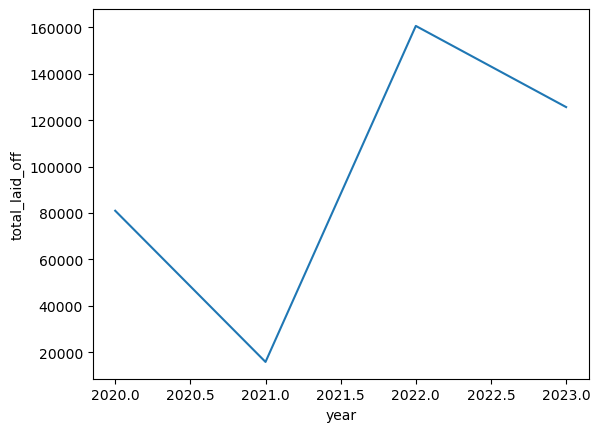

In [155]:
# Yearly trends in layoffs from 2020 to 2023

ax = sns.lineplot(x = 'year', y = 'total_laid_off', data = df, ci = None, estimator = sum)
df[['year','total_laid_off']].groupby('year').agg({'total_laid_off':'sum'})

In [162]:
#Top 10 industries which experienced the highest number of layoffs 
    
df.groupby('industry').agg({'total_laid_off': 'sum','percentage_laid_off':'sum'}).nlargest(10,"total_laid_off")

,total_laid_off,percentage_laid_off
industry,,
Consumer,44782.0,18.530
Retail,43613.0,34.730
Other,36289.0,19.300
Transportation,31248.0,23.764
Finance,28344.0,48.085
Healthcare,25953.0,36.110
Food,22855.0,27.455
Real Estate,17565.0,24.750
Travel,17129.0,15.360


In [163]:
 # Top 10 companies with the highest layoffs

df.groupby('company').agg({'total_laid_off': 'sum','percentage_laid_off':'sum'}).nlargest(10,"total_laid_off")

,total_laid_off,percentage_laid_off
company,,
Amazon,18150.0,0.0500
Google,12000.0,0.0600
Meta,11000.0,0.1300
Salesforce,10090.0,0.1285
Microsoft,10000.0,0.0500
Philips,10000.0,0.1800
Ericsson,8500.0,0.0800
Uber,7585.0,0.7500
Dell,6650.0,0.0500


In [164]:
#Distribution of layoffs across different stages of companies

df.groupby('stage').agg({'total_laid_off': 'sum','percentage_laid_off':'sum'}).nlargest(10,"total_laid_off")

,total_laid_off,percentage_laid_off
stage,,
Post-IPO,204132.0,48.7185
Unknown,40716.0,76.5300
Acquired,27576.0,26.7440
Series C,20017.0,46.3700
Series D,19225.0,30.6650
Series B,15311.0,68.6200
Series E,12697.0,15.7200
Series F,9932.0,5.4400
Private Equity,7957.0,4.6100


In [165]:
# Countries experiencing the highest number of layoffs

df.groupby('country').agg({'total_laid_off': 'sum','percentage_laid_off':'sum'}).nlargest(10,"total_laid_off")

,total_laid_off,percentage_laid_off
country,,
United States,256559.0,259.7225
India,35993.0,27.0900
Netherlands,17220.0,1.8400
Sweden,11264.0,1.8000
Brazil,10391.0,10.9700
Germany,8701.0,12.1050
United Kingdom,6398.0,15.0100
Canada,6319.0,16.6700
Singapore,5995.0,6.8000


In [181]:
# The correlation between Funds raised and Total layoffs

print(df[['funds_raised_millions','total_laid_off']].corr())

                       funds_raised_millions  total_laid_off
funds_raised_millions               1.000000        0.077194
total_laid_off                      0.077194        1.000000
